In [251]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

**Data pre-processing**

In [252]:
train_data = pd.read_csv('train_temp.csv')
test_data = pd.read_csv('test_temp.csv')
neighbour_arr = train_data['Neighborhood']
id_arr = train_data['Id']
saleprice_arr = train_data['SalePrice']

# Homework 3 - Ames Housing Dataset

For all parts below, answer all parts as shown in the Google document for Homework 3. Be sure to include both code that justifies your answer as well as text to answer the questions. We also ask that code be commented to make it easier to follow.

## Part 1 - Pairwise Correlations

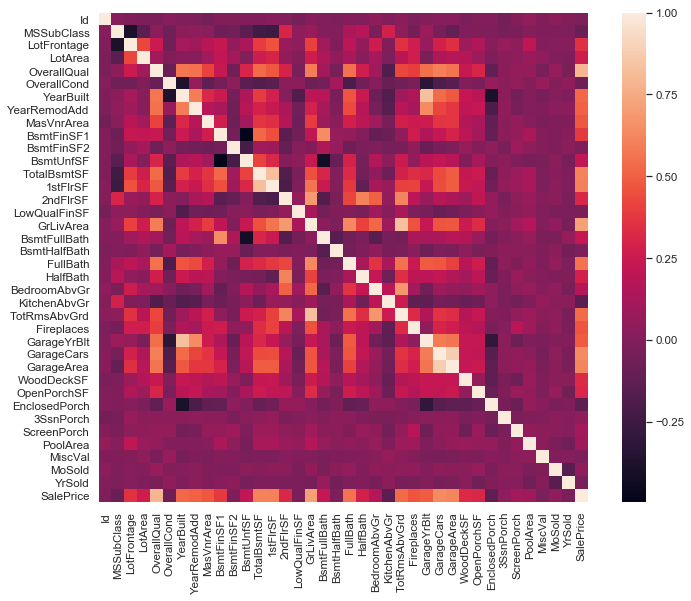

In [253]:
#correlation matrix
import matplotlib.pyplot as plt
import seaborn as sns
corrmat = train_data.corr(method='pearson')
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, square=True);

In [254]:
cols_large = corrmat.nlargest(8, 'SalePrice')['SalePrice']
cols_small = corrmat.nsmallest(6, 'SalePrice')['SalePrice']
cols = cols_large.index.append(cols_small.index)

We are trying to find correlation between SalePrice and features which perform well and badly with it.

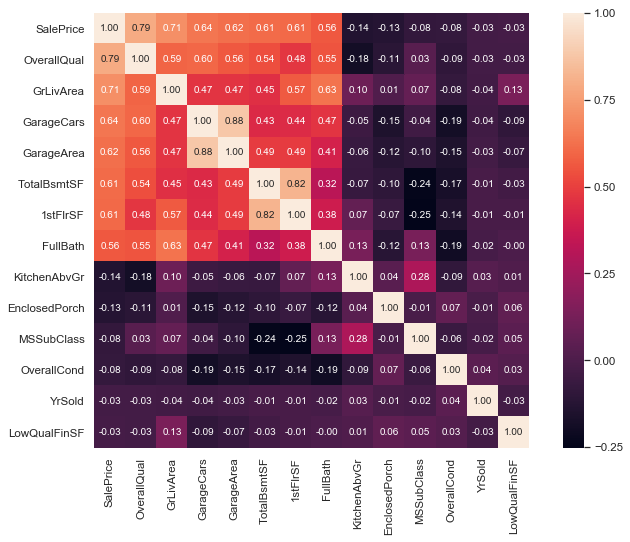

In [255]:
cm = np.corrcoef(train_data[cols].values.T)
sns.set(font_scale=1.05)
f, ax = plt.subplots(figsize=(12, 8))
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [256]:
min_cm = np.min(cm)

In [257]:
min_cm

-0.25175835187837947

From the heatmap, the least correlation is between 1stFlrSF and MSSubClass which is -0.25 and maximum correlation leaving 1 is 0.88 between GarageArea and GarageCars

## Part 2 - Informative Plots

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

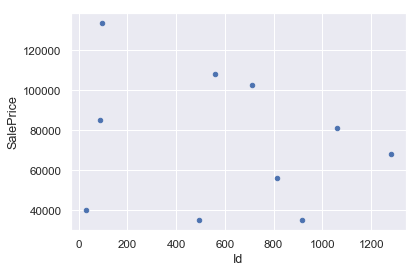

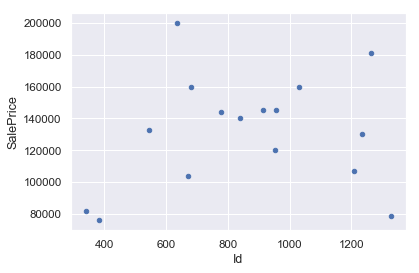

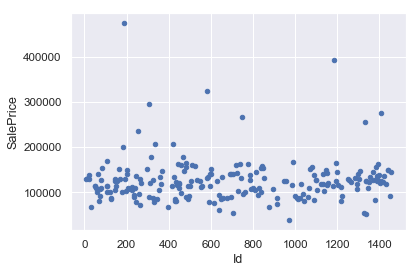

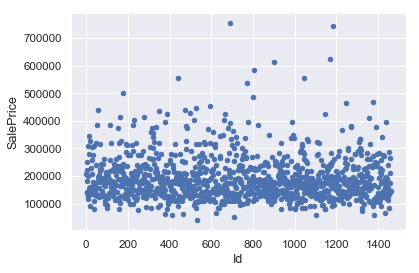

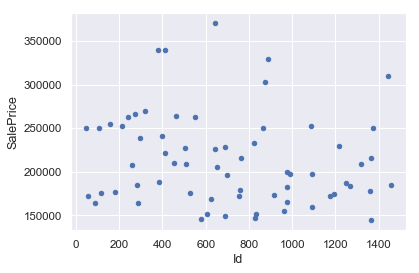

In [258]:
train_data_MsZoning_C = train_data[train_data['MSZoning']=='C (all)']
train_data_MsZoning_C.plot(x='Id', y='SalePrice', kind = 'scatter')
train_data_MsZoning_RH = train_data[train_data['MSZoning']=='RH']
train_data_MsZoning_RH.plot(x='Id', y='SalePrice', kind = 'scatter')
train_data_MsZoning_RM = train_data[train_data['MSZoning']=='RM']
train_data_MsZoning_RM.plot(x='Id', y='SalePrice', kind = 'scatter')
train_data_MsZoning_RL = train_data[train_data['MSZoning']=='RL']
train_data_MsZoning_RL.plot(x='Id', y='SalePrice', kind = 'scatter')
train_data_MsZoning_FV = train_data[train_data['MSZoning']=='FV']
train_data_MsZoning_FV.plot(x='Id', y='SalePrice', kind = 'scatter')

The following are the notations for MSZoning given in the kaggle website:
*    A    Agriculture *- missing*
*    C    Commercial
*    FV   Floating Village Residential
*    I    Industrial *- missing*
*    RH   Residential High Density
*    RL   Residential Low Density
*    RP   Residential Low Density Park *- missing*
*    RM   Residential Medium Density
We only have 5 of the above. Of which, Commercial housing generally has high price, but isn't desirable. Residencies come next. High density needn't necessarily mean desirable but it could mean it's closer to a place where all facilities are available. On the other hand, low density needn't mean the area is costly and hence the density is lesser. It could also mean the location is not good. But, in general, High densities are desirable and low densitity housing is not. Finally comes floating villages. Let's check how the dataset varies.

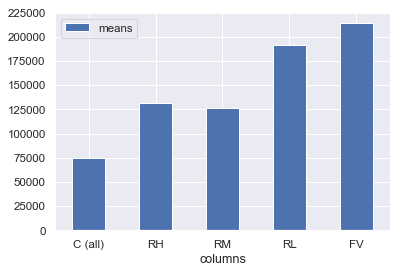

In [259]:
mean_C = np.mean(train_data_MsZoning_C['SalePrice'])
mean_RH = np.mean(train_data_MsZoning_RH['SalePrice'])
mean_RM = np.mean(train_data_MsZoning_RM['SalePrice'])
mean_RL = np.mean(train_data_MsZoning_RL['SalePrice'])
mean_FV = np.mean(train_data_MsZoning_FV['SalePrice'])
d = {'columns':['C (all)','RH','RM','RL','FV'],'means':[mean_C,mean_RH,mean_RM,mean_RL,mean_FV]}
df = pd.DataFrame(data=d)
df.plot.bar(x='columns', y='means', rot=0)

In [260]:
train_data['SalePrice'].groupby(train_data['Neighborhood']).mean()

Neighborhood
Blmngtn    194870.882353
Blueste    137500.000000
BrDale     104493.750000
BrkSide    124834.051724
ClearCr    212565.428571
CollgCr    197965.773333
Crawfor    210624.725490
Edwards    128219.700000
Gilbert    192854.506329
IDOTRR     100123.783784
MeadowV     98576.470588
Mitchel    156270.122449
NAmes      145847.080000
NPkVill    142694.444444
NWAmes     189050.068493
NoRidge    335295.317073
NridgHt    316270.623377
OldTown    128225.300885
SWISU      142591.360000
Sawyer     136793.135135
SawyerW    186555.796610
Somerst    225379.837209
StoneBr    310499.000000
Timber     242247.447368
Veenker    238772.727273
Name: SalePrice, dtype: float64

In [261]:
c1_fv = train_data_MsZoning_FV[train_data_MsZoning_FV['SalePrice']>=mean_FV]
c2_fv = train_data_MsZoning_FV[train_data_MsZoning_FV['SalePrice']<mean_FV]
c3_fv = train_data_MsZoning_FV[train_data_MsZoning_FV['SalePrice']>=mean_RL]
c1 = train_data_MsZoning_RL[train_data_MsZoning_RL['SalePrice']>=mean_RL]
c2 = train_data_MsZoning_RL[train_data_MsZoning_RL['SalePrice']<mean_RL]
c3 = train_data_MsZoning_RL[train_data_MsZoning_RL['SalePrice']>=mean_RH]

In [262]:
(len(c1)/(len(c1)+len(c2)))*100

37.35881841876629

In [263]:
(len(c3)/(len(c1)+len(c2)))*100

80.36490008688098

In [264]:
(len(c3_fv)/(len(c1_fv)+len(c2_fv)))*100

56.92307692307692

* There are too few points from plot above, however, average for commercial housing is around 74528
* For Residential High, the average is quite high which is 131558.375. This is greater than commercial types. Then, it might mean, commercial housing may not even have minimal facilities, making them much less desirable than expected, reducing the demand for them. Evenually making less costlier to live. Next one is Residential Medium.
* We have a large dataset of Residential medium density and the average is quite good. Much more than expected value and as expected, is less than Residential High density.
* Residential Low density have a surprisingly high price. With, 37% being greater than the mean value which is 191004.9 and 80% being greater than the High density mean. Our original expectation seems wrong and people seem preferable to stay in places of low densities with good features.
* Floating village as the name suggested, misled into estimating wrongly. 56% of the dataset lie above the mean of low densities and probably they're near lakeside and have a scenic view, and therefore are highly priced. 

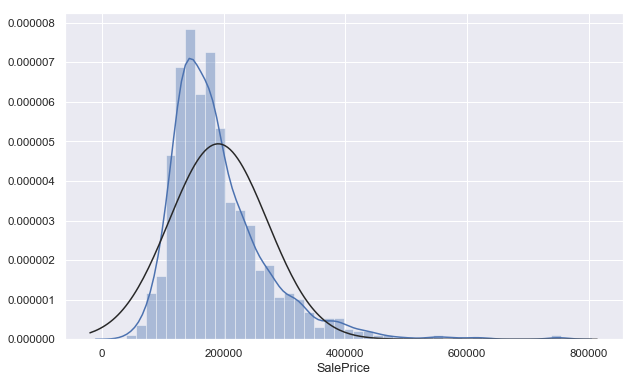

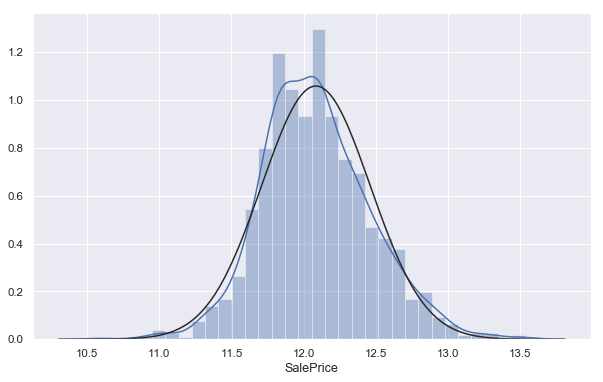

In [265]:
import seaborn as sns
from scipy.stats import norm
plt.figure(figsize=[10,6])
sns.distplot(train_data_MsZoning_RL.SalePrice, fit=norm)
plt.figure(figsize=[10,6])
sns.distplot(np.log(train_data_MsZoning_RL.SalePrice), fit=norm)

The Residency Low density plot didn't properly fit the normal distribution(right skewed) and therefore smoothing was required and applying logarithm yielded the right fit.

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


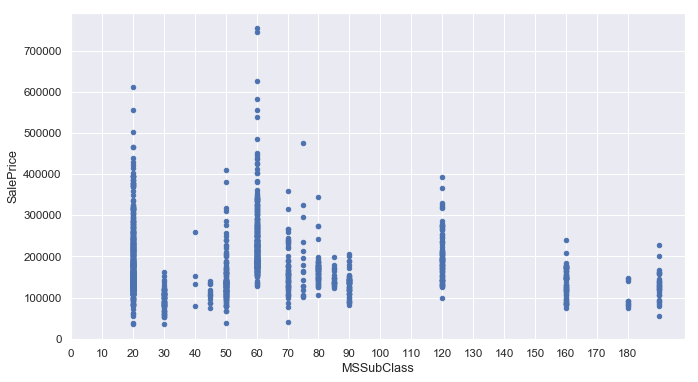

In [266]:
train_data.plot(x='MSSubClass', y='SalePrice', kind = 'scatter',xticks=range(0,190,10),figsize=(11,6))

In [267]:
m_20 = np.mean(train_data[train_data['MSSubClass']==20]['SalePrice'])
m_60 = np.mean(train_data[train_data['MSSubClass']==60]['SalePrice'])
m_120 = np.mean(train_data[train_data['MSSubClass']==120]['SalePrice'])

In [268]:
m_20

185224.81156716417

In [269]:
m_60

239948.5016722408

In [270]:
m_120

200779.0804597701

    20  1-STORY 1946 & NEWER ALL STYLES
    60  2-STORY 1946 & NEWER
    120  1-STORY PUD (Planned Unit Development) - 1946 & NEWER
Selecting these 3, Subclass 60 seems to be doing the best followed by 120 and then 20.

Text(0.5, 1.0, 'NeighborHood Vs SalePrice')

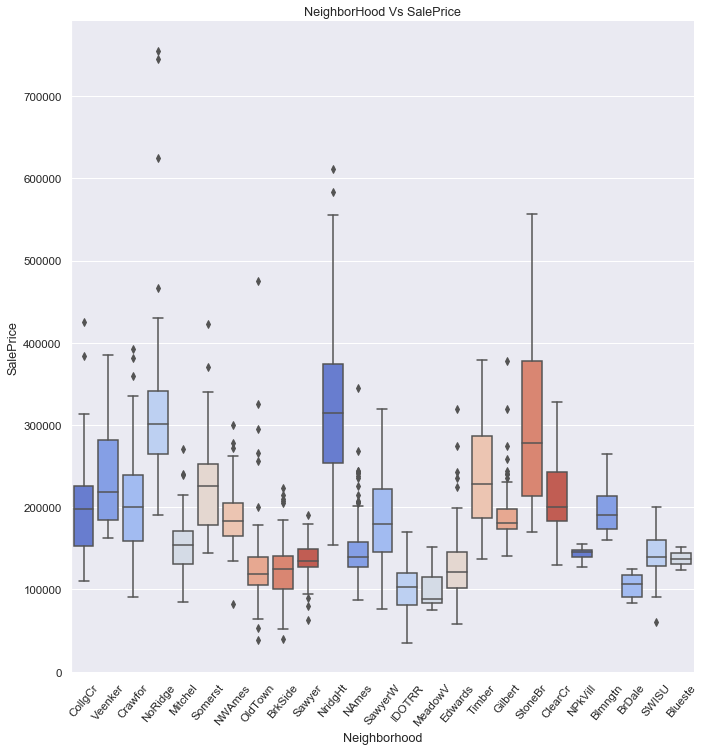

In [271]:
sns.set_palette("cubehelix")
sns.catplot(x="Neighborhood", y="SalePrice",
            kind="box", dodge=False, data=train_data, height=10, palette=sns.color_palette("coolwarm", 10))
plt.xticks(rotation=50);
plt.title('NeighborHood Vs SalePrice')

As we can see, neighborhood plays a keyfactor in determining SalePrice. For few neighborhoods like NoRidge, NridgHT,StoneBr the averages are quite high while for others it is a lot lesser

In [272]:
neighborhood = np.unique(train_data["Neighborhood"])
mean_arr=[]
for neigh in neighborhood:
    mean_arr.append(np.mean(train_data[train_data["Neighborhood"]==neigh]["SalePrice"]))
df = pd.DataFrame({"Neighborhood":neighborhood,"Mean":mean_arr})

Text(0.5, 1.0, 'NeighborHood Vs Mean SalePrice')

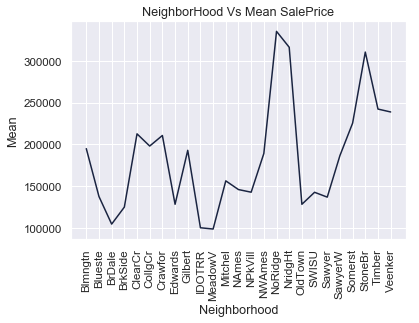

In [273]:
plt.plot(df["Neighborhood"], df["Mean"])
plt.xticks(rotation=90);
plt.xlabel('Neighborhood')
plt.ylabel('Mean')
plt.title('NeighborHood Vs Mean SalePrice')

The above plot shows the average values of various neighborhoods as a line chart. We can see NoRidge, DridgHt, StoneBr dominates the most and others follow.

## Part 3 - Handcrafted Scoring Function

In [274]:
def scorefunc(input_data,params,weights,powers):
    if len(params)!=len(weights) or len(params)!=len(powers):
        return False
    output = 0
    for i in range(len(params)):
        output+= (input_data[params[i]]*weights[i])**powers[i]
    return output

In [275]:
import pandas as pd
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
train_data = pd.read_csv('train_temp.csv')
train_data = train_data.drop('Id',axis=1)
col_miss_val = [col for col in train_data.columns if train_data[col].isnull().any()]
for col in col_miss_val:
    if(train_data[col].dtype == np.dtype('O')):
         train_data[col]=train_data[col].fillna(train_data[col].value_counts().index[0])    #replace nan with most frequent
    else:
        train_data[col] = train_data[col].fillna(train_data[col].median()) 
LE = LabelEncoder()
for col in train_data.select_dtypes(include=['object']):
    train_data[col] = LE.fit_transform(train_data[col])
score_params = ['GrLivArea', 'YearBuilt', 'GarageArea', 'OverallCond','PoolQC']
weights = [1/np.mean(train_data[score_params[0]]),1/np.mean(train_data[score_params[1]]),
           1/np.mean(train_data[score_params[2]]),1/np.mean(train_data[score_params[3]]),1]
powers = [2,1,1,1,1]
train_data['desirability'] = scorefunc(train_data,score_params,weights,powers)

In [276]:
train_data_sorted_desc = train_data.sort_values(by=['desirability'], ascending=False)
train_data_sorted_desc.head(10)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,desirability
1298,60,3,313.0,63887,1,0,2,0,0,0,...,2,2,2,0,1,2008,6,5,160000,20.773830
523,60,3,130.0,40094,1,0,0,0,0,4,...,2,2,2,0,10,2007,6,5,184750,15.304393
691,60,3,104.0,21535,1,0,0,3,0,0,...,2,2,2,0,1,2007,8,4,755000,13.957709
1182,60,3,160.0,15623,1,0,0,3,0,0,...,0,2,2,0,7,2007,8,0,745000,12.351707
185,75,4,90.0,22950,1,0,1,3,0,4,...,2,0,2,0,6,2006,8,4,475000,12.018171
1268,50,3,69.0,14100,1,0,0,3,0,4,...,2,1,2,0,5,2008,8,4,381000,11.913289
304,75,4,87.0,18386,1,0,3,3,0,4,...,2,2,2,0,5,2008,8,4,295000,11.719940
1169,60,3,118.0,35760,1,0,0,3,0,1,...,2,2,2,0,7,2006,8,4,625000,11.343061
769,60,3,47.0,53504,1,0,1,1,0,1,...,2,2,2,0,6,2010,8,4,538000,10.372563
798,60,3,104.0,13518,1,0,3,3,0,4,...,2,2,2,0,7,2009,6,5,485000,9.942200


Having a greater ground living area, the year built, garage area, overall condition and pool have been considered highly desirable. These 10 are the most desirable based on these factors. And we can see their saleprice is quite good.

In [277]:
train_data_sorted = train_data.sort_values(by=['desirability'])
train_data_sorted.head(10)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,desirability
375,30,3,69.0,10020,1,0,0,2,0,4,...,2,2,2,0,3,2009,8,4,61000,3.510201
533,20,3,50.0,5000,1,0,3,2,0,4,...,2,2,2,0,1,2007,8,4,39300,3.573839
636,30,4,51.0,6120,1,0,3,3,0,4,...,2,2,2,0,1,2009,5,4,60000,3.798862
620,30,3,45.0,8248,1,0,3,3,0,4,...,2,2,2,0,9,2008,8,4,67000,3.834072
1337,30,4,153.0,4118,1,0,0,0,0,0,...,2,2,2,0,3,2006,8,4,52500,3.911201
1325,30,4,40.0,3636,1,0,3,3,0,4,...,2,2,2,0,1,2008,8,4,55000,3.968341
1143,20,3,69.0,9000,1,0,3,3,0,4,...,2,2,2,0,7,2008,8,4,80000,3.972522
287,20,3,69.0,8125,1,0,0,3,0,0,...,2,2,2,0,6,2006,8,4,88000,4.037850
250,30,3,55.0,5350,1,0,0,3,0,4,...,2,1,2,450,5,2010,8,4,76500,4.085530
495,30,0,60.0,7879,1,0,3,3,0,4,...,2,1,2,0,11,2009,8,0,34900,4.096520


These 10 are the least desirable based on these factors. And we can see their saleprice is quite low. 

In [278]:
train_data['desirability'].corr(train_data['SalePrice'])

0.7350642709249529

The scoring function seems to work fine since it's in good correlation with the SalePrice(needn't be but it's a good indicator). With 0.74(rounded) correlation, the scoring function has done fine.

## Part 4 - Pairwise Distance Function

In [279]:
#from sklearn.metrics import pairwise_distances
'''import pandas as pd
from sklearn import preprocessing
train_data = pd.read_csv('train_temp.csv')
train_data = train_data.drop('Id',axis=1)
col_miss_val = [col for col in train_data.columns if train_data[col].isnull().any()]
for col in col_miss_val:
    if(train_data[col].dtype == np.dtype('O')):
         train_data[col]=train_data[col].fillna(train_data[col].value_counts().index[0])    #replace nan with most frequent
    else:
        train_data[col] = train_data[col].fillna(train_data[col].median()) 
LE = LabelEncoder()
for col in train_data.select_dtypes(include=['object']):
    train_data[col] = LE.fit_transform(train_data[col])
    
x = train_data.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
train_data = pd.DataFrame(x_scaled,columns=train_data.columns)'''
#ds = pairwise_distances(train_data)

"import pandas as pd\nfrom sklearn import preprocessing\ntrain_data = pd.read_csv('train_temp.csv')\ntrain_data = train_data.drop('Id',axis=1)\ncol_miss_val = [col for col in train_data.columns if train_data[col].isnull().any()]\nfor col in col_miss_val:\n    if(train_data[col].dtype == np.dtype('O')):\n         train_data[col]=train_data[col].fillna(train_data[col].value_counts().index[0])    #replace nan with most frequent\n    else:\n        train_data[col] = train_data[col].fillna(train_data[col].median()) \nLE = LabelEncoder()\nfor col in train_data.select_dtypes(include=['object']):\n    train_data[col] = LE.fit_transform(train_data[col])\n    \nx = train_data.values #returns a numpy array\nmin_max_scaler = preprocessing.MinMaxScaler()\nx_scaled = min_max_scaler.fit_transform(x)\ntrain_data = pd.DataFrame(x_scaled,columns=train_data.columns)"

In [280]:
#from sklearn.metrics import pairwise_distances
import pandas as pd
from sklearn import preprocessing
train_data = pd.read_csv('train_temp.csv')
test_data = pd.read_csv('test_temp.csv')
train_id_arr = train_data['Id']
test_id_arr = test_data['Id']
train_data_copy = train_data
test_data_copy = test_data
train_data_copy = train_data_copy.drop("Id", axis = 1)
test_data_copy = test_data_copy.drop("Id", axis = 1)

keys_to_fill_na = [ "FireplaceQu","PoolQC","Alley", "BsmtQual", "BsmtCond", "BsmtExposure", "BsmtFinType1", 
                    "BsmtFinType2", "GarageType", "GarageFinish", "GarageQual", 
                    "GarageCond", "Fence"]
for key in keys_to_fill_na:
    train_data_copy[key].fillna("NA", inplace=True)
    test_data_copy[key].fillna("NA", inplace=True)
keys_to_fill_none = [ "MiscFeature","MasVnrType"]
for key in keys_to_fill_none:
    train_data_copy[key].fillna("None", inplace=True)
    test_data_copy[key].fillna("None", inplace=True)
    
#Enumerate Subclass and sold column data as below
dict1 = {20 : "Sub20", 30 : "Sub30", 40 : "Sub40", 45 : "Sub45",50 : "Sub50", 60 : "Sub60", 70 : "Sub70", 75 : "Sub75", 
         80 : "Sub80", 85 : "Sub85", 90 : "Sub90", 120 : "Sub120", 150 : "Sub150", 160 : "Sub160", 180 : "Sub180",
         190 : "Sub190"}
dict2 = {1 : "Jan", 2 : "Feb", 3 : "Mar", 4 : "Apr", 5 : "May", 6 : "Jun", 7 : "Jul", 8 : "Aug", 9 : "Sep", 10 : "Oct",
         11 : "Nov", 12 : "Dec"}
train_data_copy = train_data_copy.replace({"MSSubClass" : dict1,"MoSold" : dict2})
test_data_copy = test_data_copy.replace({"MSSubClass" : dict1,"MoSold" : dict2})

col_missing = []
for col in train_data_copy.columns:
    if len(np.unique(train_data_copy[col].isnull()))>1:
        col_missing.append(col)
for missing_col in col_missing:
    if train_data_copy[missing_col].dtype=='float64':
        train_data_copy[missing_col] = np.nanmedian(train_data_copy[missing_col])
    if train_data_copy[missing_col].dtype=='int64':
        train_data_copy[missing_col] = np.nanmedian(train_data_copy[missing_col])

col_missing_test = []
for col in test_data_copy.columns:
    if len(np.unique(test_data_copy[col].isnull()))>1:
        col_missing_test.append(col)
for missing_col in col_missing_test:
    if test_data_copy[missing_col].dtype=='float64':
        test_data_copy[missing_col] = np.nanmedian(test_data_copy[missing_col])
    if test_data_copy[missing_col].dtype=='int64':
        test_data_copy[missing_col] = np.nanmedian(test_data_copy[missing_col])
        
train_data_copy.drop("LotFrontage", axis=1, inplace=True)
test_data_copy.drop("LotFrontage", axis=1, inplace=True)

keys_to_fill_mode = ['Electrical', 'Exterior1st', 'Exterior2nd', 'Functional','KitchenQual','MSZoning','SaleType','Utilities']
for key in keys_to_fill_mode:
    train_data_copy[key]=train_data_copy[key].fillna(train_data_copy[key].mode()[0])    #replace nan with most frequent
    test_data_copy[key]=test_data_copy[key].fillna(test_data_copy[key].mode()[0])    #replace nan with most frequent
    
#Add new features to train and test data based on quality of the house and number of bathrooms
train_data_copy["TotalSF"] = train_data_copy["GrLivArea"] + train_data_copy["TotalBsmtSF"]
test_data_copy["TotalSF"] = test_data_copy["GrLivArea"] + test_data_copy["TotalBsmtSF"]

train_data_copy["TotalFlrSF"] = train_data_copy["1stFlrSF"] + train_data_copy["2ndFlrSF"]
test_data_copy["TotalFlrSF"] = test_data_copy["1stFlrSF"] + test_data_copy["2ndFlrSF"]

train_data_copy["TotalBath"] = train_data_copy["BsmtFullBath"] + ((1/2)*train_data_copy["BsmtHalfBath"])+ train_data_copy["FullBath"] + ((1/2) * train_data_copy["HalfBath"])
test_data_copy["TotalBath"] = test_data_copy["BsmtFullBath"] + ((1/2)*test_data_copy["BsmtHalfBath"]) + test_data_copy["FullBath"] + ((1/2) * test_data_copy["HalfBath"])
#multiplied by 1/2 because it's mentioned half

train_data_copy["TotalPorchSF"] = train_data_copy["OpenPorchSF"] + train_data_copy["EnclosedPorch"] + train_data_copy["3SsnPorch"] + train_data_copy["ScreenPorch"]
test_data_copy["TotalPorchSF"] = test_data_copy["OpenPorchSF"] + test_data_copy["EnclosedPorch"] + test_data_copy["3SsnPorch"] + test_data_copy["ScreenPorch"]

cat_train = train_data_copy.select_dtypes(include=[np.object])
cat_test = test_data_copy.select_dtypes(include=[np.object])
cat_train_test = pd.concat([cat_train,cat_test])
cat_onehot = pd.get_dummies(cat_train_test, columns=cat_train_test.columns)
cat_train_encod = cat_onehot[:cat_train.shape[0]]
cat_test_encod = cat_onehot[cat_train.shape[0]:]
train_filtered = pd.concat([train_data_copy, cat_train_encod],axis=1)
test_filtered = pd.concat([test_data_copy, cat_test_encod],axis=1)

#y_train = np.log(train_filtered['SalePrice'])
#train_filtered.drop(['SalePrice'], axis = 1, inplace=True)
train_filtered = train_filtered.select_dtypes(exclude=['object'])
test_filtered = test_filtered.select_dtypes(exclude=['object'])

x = train_filtered.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
train_filtered = pd.DataFrame(x_scaled,columns=train_filtered.columns)

In [281]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
pca = PCA(n_components=50)
principalComponents = pca.fit_transform(train_filtered)
principalDf = pd.DataFrame(data = principalComponents)
X_embedded = TSNE(n_components=2).fit_transform(principalDf)
X_embedded.shape

(1460, 2)

In [282]:
def pairwise_man(x,y): #Manhatan metric
    if len(x) != len(y):
        return False
    else:
        return sum([abs(a-b) for a,b in zip(x,y)])

In [283]:
def pairwise_euc(x,y): #Eucledian metric
    if len(x) != len(y):
        return False
    else:
        return np.sqrt(sum([(a-b)**2 for a,b in zip(x,y)]))

In [284]:
distance = []
for i in range(len(X_embedded)):
    dist = []
    for j in range(len(X_embedded)):
        dist.append(pairwise_euc(X_embedded[i], X_embedded[j]))
    distance.append(dist)

In [285]:
distance_man = []
for i in range(len(X_embedded)):
    dist = []
    for j in range(len(X_embedded)):
        dist.append(pairwise_man(X_embedded[i], X_embedded[j]))
    distance_man.append(dist)

In [286]:
n_true = 0
n_false = 0
for i in range(len(distance)):
    unsorted_arr = distance[i]
    sorted_arr = np.sort(distance[i])
    ii = np.where(unsorted_arr == sorted_arr[1])[0]#ignoring 0
    if neighbour_arr[ii[0]]==neighbour_arr[i]:
        n_true=n_true+1
    else:
        n_false=n_false+1

In [287]:
(n_true/(n_true+n_false))*100

50.890410958904106

1. Implemented one hot encoding and did some feature engineering before applying pairwise distances. 
2. Normalized the data using min-max scaler and then reduced 300+ dimensions to 50 using PCA.
3. Finally used tsne and reduced the dimensions to 2. 
4. Then applied the handcrafted euclidean distance function and obtained the distance vector using O(n^2).
5. Finally we check if the nearest distance point contain the same neighbourhood. If it contains, we increment the true and if it doesn't we increment false.
6. We obtain the above by sorting distance array and taking the one with least pair-wise distance. Then we get the index of the element from the original dataset and check if we have the same neighborhood from the neighborhood array
7. Obtained approximately 51% times neighbourhood matching the nearest. 

## Part 5 - Clustering

In [288]:
import sys
import numpy
numpy.set_printoptions(threshold=sys.maxsize)

In [289]:
from sklearn.cluster import AgglomerativeClustering
clustering = AgglomerativeClustering(affinity='precomputed', compute_full_tree='auto',
                        connectivity=None,
                        linkage='single', memory=None, n_clusters=10,
                        pooling_func='deprecated').fit(distance)

In [290]:
labels = clustering.labels_
x_embeddf = pd.DataFrame(X_embedded)

In [291]:
to_plot = pd.DataFrame()
to_plot['Id'] = train_data['Id']
to_plot['x_coord'] = x_embeddf[0]
to_plot['y_coord'] = x_embeddf[1]
to_plot['clusters'] = clustering.labels_

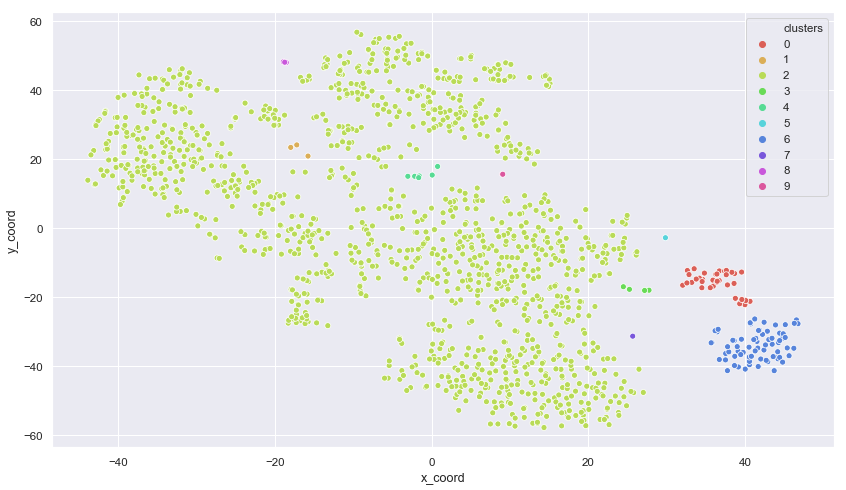

In [292]:
import seaborn as sns
plt.figure(figsize=[14,8])
ax = sns.scatterplot(x="x_coord", y="y_coord",hue="clusters",legend="full",palette=sns.color_palette("hls", 10),data=to_plot);

In [293]:
import numpy as np
import operator
df_main = pd.DataFrame()
for i in range(0,10):
    neigh = neighbour_arr[labels==i]
    unique, counts = np.unique(neigh, return_counts=True)
    d = dict(zip(unique, counts))
    sorted_d = sorted(d.items(), key=operator.itemgetter(1),reverse=True)
    percent = (sorted_d[0][1]/sum(d.values()))*100
    neighbor = sorted_d[0][0]
    count = sorted_d[0][1]
    df = pd.DataFrame({'centre': i,'Neighborhood': neighbor,'count':count,'percent':percent}, index = [i])
    print(df)

   centre Neighborhood  count    percent
0       0      Edwards     10  27.777778
   centre Neighborhood  count    percent
1       1      Mitchel      1  33.333333
   centre Neighborhood  count    percent
2       2        NAmes    209  15.714286
   centre Neighborhood  count  percent
3       3      Edwards      4    100.0
   centre Neighborhood  count    percent
4       4      SawyerW      2  33.333333
   centre Neighborhood  count  percent
5       5      OldTown      1    100.0
   centre Neighborhood  count    percent
6       6      Edwards     19  25.675676
   centre Neighborhood  count  percent
7       7      BrkSide      1    100.0
   centre Neighborhood  count  percent
8       8      Crawfor      3    100.0
   centre Neighborhood  count  percent
9       9      Mitchel      2    100.0


In [294]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=10, random_state=0).fit(X_embedded)
kmeans_to_plot = pd.DataFrame()
kmeans_to_plot['Id'] = train_data['Id']
kmeans_to_plot['x_coord'] = x_embeddf[0]
kmeans_to_plot['y_coord'] = x_embeddf[1]
kmeans_to_plot['clusters'] = kmeans.labels_

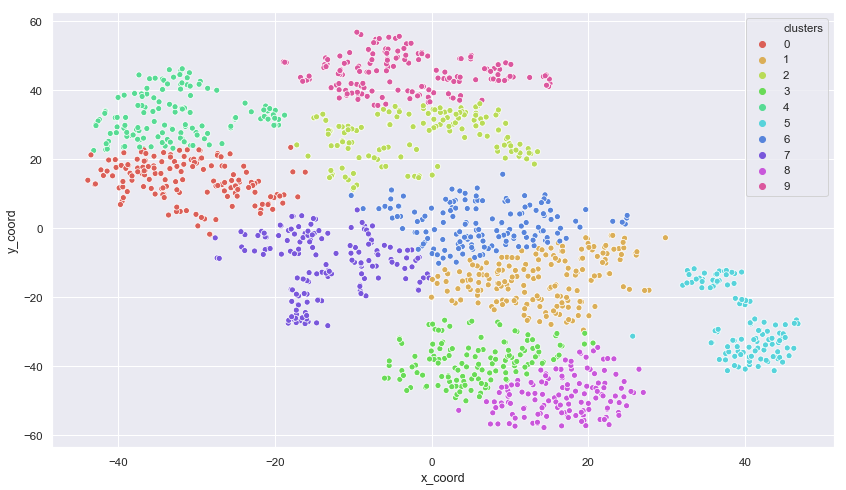

In [295]:
import seaborn as sns
plt.figure(figsize=[14,8])
ax = sns.scatterplot(x="x_coord", y="y_coord",hue="clusters",legend="full",palette=sns.color_palette("hls", 10)
                     ,data=kmeans_to_plot);

In [296]:
import operator
import numpy as np
df_main = pd.DataFrame()
for i in range(0,10):
    neigh = neighbour_arr[kmeans.labels_==i]
    unique, counts = np.unique(neigh, return_counts=True)
    d = dict(zip(unique, counts))
    if(len(d)>0):
        sorted_d = sorted(d.items(), key=operator.itemgetter(1),reverse=True)
        percent = (sorted_d[0][1]/sum(d.values()))*100
        neighbor = sorted_d[0][0]
        count = sorted_d[0][1]
        df = pd.DataFrame({'centre': i,'Neighborhood': neighbor,'count':count,'percent':percent}, index = [i])
        print(df)

   centre Neighborhood  count    percent
0       0      Gilbert     41  27.702703
   centre Neighborhood  count    percent
1       1        NAmes    107  59.776536
   centre Neighborhood  count    percent
2       2      CollgCr     48  35.294118
   centre Neighborhood  count    percent
3       3      Edwards     24  17.142857
   centre Neighborhood  count    percent
4       4      Somerst     48  33.333333
   centre Neighborhood  count    percent
5       5      Edwards     29  26.126126
   centre Neighborhood  count    percent
6       6        NAmes     47  30.322581
   centre Neighborhood  count    percent
7       7       NWAmes     35  23.026316
   centre Neighborhood  count    percent
8       8      OldTown     74  56.060606
   centre Neighborhood  count    percent
9       9      NridgHt     50  30.674847


We applied two algorithms here, Agglomerative and kmeans.
1. Agglomerative takes distance matrix(handwritten output of euclidean given here) as input and gives out the cluster labels, from which we determine the cluster it belongs too. As we can see from graphs above, agglomerative does non-uniform clustering with centre 1 occupying the majority of data, which contained 'NAmes'. However, the clusters have a clear separation of the neighborhoods in this form of clustering
2. Kmeans takes input as X_embedded, which is the output of tsne and clusters using euclidean by default and performs clustering. Contrasting to previous case, kmeans does smaller clusters and one can see 'NAmes' appears majority in 2 neighborhoods. Kmeans makes sure every cluster is uniformly distributed and therefore the results appear as such.

## Part 6 - Linear Regression

In [297]:
from sklearn.preprocessing import LabelEncoder
from sklearn import linear_model
from sklearn import metrics
train_data = pd.read_csv('train_temp.csv')
x = train_data
y = train_data['SalePrice']
col_miss_val = [col for col in x.columns if x[col].isnull().any()]
for col in col_miss_val:
    if(x[col].dtype == np.dtype('O')):
         x[col]=x[col].fillna(x[col].value_counts().index[0])    #replace nan with most frequent
    else:
        x[col] = train_data[col].fillna(x[col].median()) 
LE = LabelEncoder()
for col in x.select_dtypes(include=['object']):
    x[col] = LE.fit_transform(x[col])
lm = linear_model.LinearRegression()
x = x.drop(['Id','SalePrice'],axis=1)
model = lm.fit(x,y)
y_fit = model.predict(x)
RMSE = np.sqrt(metrics.mean_squared_error(y, y_fit))
RMSE

30022.875211221748

In [298]:
y_ = np.log(y)
model = lm.fit(x,y_)
y_fit = model.predict(x)
RMSE = np.sqrt(metrics.mean_squared_error(y_, y_fit))
RMSE

0.13357330661378403

In [299]:
import operator
coeffs = model.coef_
index_max, value_max = max(enumerate(coeffs), key=operator.itemgetter(1))
index_min, value_min = min(enumerate(coeffs), key=operator.itemgetter(1))

In [300]:
value_min

-0.22144831525522518

In [301]:
x.columns[index_min]

'PoolQC'

In [302]:
value_max

0.1877445046910877

In [303]:
x.columns[index_max]

'Street'

1. Applying all the dataset on the model yields an RMSE of 30000, which is quite huge.
2. Now, if we apply on log plot, we get 0.1335. By applying inverse log we can convert to the required format.
3. The one with the maximum absolute weight contributes greatly towards the linear regression model. As we can see, PoolQC has a negative coefficient of value 0.22 and it is the most important one. And in positive coefficients, Street has the maximum.

## Part 7 - External Dataset

In [304]:
import pandas as pd
train_data = pd.read_csv('train_temp.csv')
test_data = pd.read_csv('test_temp.csv')
x = train_data
add_data = {}
national_burglary_rate = 430.4
national_assault_rate= 248.9
national_robbery_rate = 98
national_rape_rate = 41.7
national_murder_rate = 5.3
national_car_theft_rate = 237.4
#https://en.wikipedia.org/wiki/Crime_in_the_United_States - national average rates

#Searched all the cities from here and added here
#In case of missing data, we substituted with Ames city average
#https://www.addressreport.com/report/neighborhood/ames-ia/somerset-ames-ia/?display=true


#first five are household_income,renters,sales_tax,property_tax and remaining are understood

ames_average = [46358,0.56,0.07,2479,
                (1-0.30)*national_burglary_rate,(1-0.66)*national_assault_rate,
                (1-0.94)*national_robbery_rate,(1-0.0)*national_rape_rate,
                (1-0.81)*national_murder_rate,(1-0.67)*national_car_theft_rate]

add_data['Blmngtn'] = [95256,0.16,0.07,3742,
                      (1-0.05)*national_burglary_rate,(1-0.70)*national_assault_rate,
                      (1-0.98)*national_robbery_rate,(1-0.54)*national_rape_rate,
                      (1-0.79)*national_murder_rate,(1-0.77)*national_car_theft_rate]

add_data['Blueste'] = ames_average #missing data

add_data['BrDale'] = [45558,0.60,0.07,1785,
                      (1-0.14)*national_burglary_rate,(1-0.58)*national_assault_rate,
                      (1-0.94)*national_robbery_rate,(1-0.26)*national_rape_rate,
                      (1-0.89)*national_murder_rate,(1-0.70)*national_car_theft_rate]

add_data['BrkSide'] = ames_average #missing data

add_data['ClearCr'] = ames_average #missing data

add_data['CollgCr'] = [66875,0.45,0.07,2616,
            (1-0.26)*national_burglary_rate,(1-0.64)*national_assault_rate,
            (1-0.93)*national_robbery_rate,(1+0.11)*national_rape_rate,
            (1-0.92)*national_murder_rate,(1-0.54)*national_car_theft_rate]

add_data['Crawfor'] = ames_average #missing data

add_data['Edwards'] = ames_average #missing data

add_data['Gilbert'] = ames_average #missing data

add_data['IDOTRR'] = ames_average #missing data

add_data['MeadowV'] = [53962,0.49,0.07,1521,
            (1-0.52)*national_burglary_rate,(1-0.77)*national_assault_rate,
            (1-0.92)*national_robbery_rate,(1+0.22)*national_rape_rate,
            (1-0.78)*national_murder_rate,(1-0.46)*national_car_theft_rate]

add_data['Mitchel'] = ames_average #missing data

add_data['NAmes'] = ames_average #missing data

add_data['NoRidge'] = ames_average #missing data

add_data['NPkVill'] = ames_average #missing data

add_data['NridgHt'] = [95256,0.16,0.07,5478,
            (1-0.05)*national_burglary_rate,(1-0.70)*national_assault_rate,
            (1-0.98)*national_robbery_rate,(1-0.54)*national_rape_rate,
            (1-0.79)*national_murder_rate,(1-0.77)*national_car_theft_rate]

add_data['NWAmes'] = ames_average #missing data

add_data['OldTown'] = ames_average #missing data

add_data['SWISU'] = ames_average #missing data

add_data['Sawyer'] = ames_average #missing data

add_data['SawyerW'] = ames_average #missing data

add_data['Somerst'] = [84600,0.38,0.07,2314,
            (1+0.09)*national_burglary_rate,(1-0.60)*national_assault_rate,
            (1-0.97)*national_robbery_rate,(1-0.39)*national_rape_rate,
            (1-0.78)*national_murder_rate,(1-0.69)*national_car_theft_rate]

add_data['StoneBr'] = [95256,0.16,0.07,4369,
            (1-0.05)*national_burglary_rate,(1-0.70)*national_assault_rate,
            (1-0.98)*national_robbery_rate,(1-0.54)*national_rape_rate,
            (1-0.79)*national_murder_rate,(1-0.77)*national_car_theft_rate]

add_data['Timber'] = ames_average #missing data

add_data['Veenker'] = ames_average #missing data


x = train_data
x['household_income'] = 0
x['renters'] = 0
x['sales_tax'] = 0
x['property_tax'] = 0
x['burglary_rate'] = 0
x['assault_rate'] = 0
x['robbery_rate'] = 0
x['rape_rate'] = 0
x['murder_rate'] = 0
x['car_theft_rate'] = 0

keyset = ['household_income','renters','sales_tax','property_tax','burglary_rate','assault_rate','robbery_rate',
        'rape_rate','murder_rate','car_theft_rate']

#for key in add_data:
#    for i in range(len(keyset)):
#        print(add_data[key][i])
#        x[x['Neighborhood']==key][keyset[i]] = add_data[key][i]

household_arr = []
renters_arr = []
sales_tax_arr = []
property_tax_arr=[]
burglary_rate_arr=[]
assault_rate_arr=[]
robbery_rate_arr=[]
rape_rate_arr=[]
murder_rate_arr=[]
car_theft_rate_arr=[]
for i in range(len(x)):
    neighborhood = x.iloc[i]['Neighborhood']
    household_arr.append(add_data[neighborhood][0])
    renters_arr.append(add_data[neighborhood][1])
    sales_tax_arr.append(add_data[neighborhood][2])
    property_tax_arr.append(add_data[neighborhood][3])
    burglary_rate_arr.append(add_data[neighborhood][4])
    assault_rate_arr.append(add_data[neighborhood][5])
    robbery_rate_arr.append(add_data[neighborhood][6])
    rape_rate_arr.append(add_data[neighborhood][7])
    murder_rate_arr.append(add_data[neighborhood][8])
    car_theft_rate_arr.append(add_data[neighborhood][9])
x['household_income']=household_arr
x['renters']=renters_arr
x['sales_tax']=sales_tax_arr
x['property_tax']=property_tax_arr
x['burglary_rate']=burglary_rate_arr
x['assault_rate']=assault_rate_arr
x['robbery_rate']=robbery_rate_arr
x['rape_rate']=rape_rate_arr
x['murder_rate']=murder_rate_arr
x['car_theft_rate']=car_theft_rate_arr


x_test = test_data
x_test['household_income'] = 0
x_test['renters'] = 0
x_test['sales_tax'] = 0
x_test['property_tax'] = 0
x_test['burglary_rate'] = 0
x_test['assault_rate'] = 0
x_test['robbery_rate'] = 0
x_test['rape_rate'] = 0
x_test['murder_rate'] = 0
x_test['car_theft_rate'] = 0

household_arr_test = []
renters_arr_test = []
sales_tax_arr_test = []
property_tax_arr_test=[]
burglary_rate_arr_test=[]
assault_rate_arr_test=[]
robbery_rate_arr_test=[]
rape_rate_arr_test=[]
murder_rate_arr_test=[]
car_theft_rate_arr_test=[]
for i in range(len(x_test)):
    neighborhood = x_test.iloc[i]['Neighborhood']
    household_arr_test.append(add_data[neighborhood][0])
    renters_arr_test.append(add_data[neighborhood][1])
    sales_tax_arr_test.append(add_data[neighborhood][2])
    property_tax_arr_test.append(add_data[neighborhood][3])
    burglary_rate_arr_test.append(add_data[neighborhood][4])
    assault_rate_arr_test.append(add_data[neighborhood][5])
    robbery_rate_arr_test.append(add_data[neighborhood][6])
    rape_rate_arr_test.append(add_data[neighborhood][7])
    murder_rate_arr_test.append(add_data[neighborhood][8])
    car_theft_rate_arr_test.append(add_data[neighborhood][9])
x_test['household_income']=household_arr_test
x_test['renters']=renters_arr_test
x_test['sales_tax']=sales_tax_arr_test
x_test['property_tax']=property_tax_arr_test
x_test['burglary_rate']=burglary_rate_arr_test
x_test['assault_rate']=assault_rate_arr_test
x_test['robbery_rate']=robbery_rate_arr_test
x_test['rape_rate']=rape_rate_arr_test
x_test['murder_rate']=murder_rate_arr_test
x_test['car_theft_rate']=car_theft_rate_arr_test

In [305]:
#Baseline Model
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics
from scipy import stats 
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score
import base64
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn import linear_model
from sklearn import metrics
test_data = pd.read_csv('test_temp.csv')
#x = train_data
y = x['SalePrice']


col_miss_val = [col for col in x.columns if x[col].isnull().any()]
for col in col_miss_val:
    if(x[col].dtype == np.dtype('O')):
         x[col]=x[col].fillna(x[col].value_counts().index[0])    #replace nan with most frequent
    else:
        x[col] = x[col].fillna(x[col].median()) 
test_col_miss_val = [col for col in test_data.columns if test_data[col].isnull().any()]
for col in test_col_miss_val:
    if(test_data[col].dtype == np.dtype('O')):
        test_data[col] = test_data[col].fillna(test_data[col].value_counts().index[0])    #replace nan with most frequent      
    else:
        test_data[col] = test_data[col].fillna(test_data[col].median())
LE = LabelEncoder()
for col in test_data.select_dtypes(include=['object']):
    test_data[col] = LE.fit_transform(test_data[col]) 

for col in x.select_dtypes(include=['object']):
    x[col] = LE.fit_transform(x[col])
y = x["SalePrice"]
y = np.log(y+1)
x = x.drop(['Id','SalePrice'],axis=1)
lm = linear_model.LinearRegression()
model = lm.fit(x,y)
y_pred = model.predict(x)
RMSE = np.sqrt(metrics.mean_squared_error(y, y_pred))
print(RMSE)
residual = y - y_pred
z = np.abs(stats.zscore(residual))
outliers1=np.where(abs(z) > abs(z).std() * 3)[0]
x = x.drop(outliers1)
y = y.drop(outliers1)
lm.fit(x, y)
y_pred = lm.predict(x)
RMSE = np.sqrt(metrics.mean_squared_error(y, y_pred))
print(RMSE)

0.13068097305285897
0.09094826262107804


1. Obtained the national averages from https://en.wikipedia.org/wiki/Crime_in_the_United_States.
2. Then used https://www.addressreport.com and obtained household_income,renters,sales_tax,property_tax,burglary_rate, assault_rate, robbery_rate, rape_rate, murder_rate, car_theft_rate for available neighborhoods within Ames and filled the missing data with  average rates in Ames city.
3. Then appended the dataset to the original one and applied Linear regression model.
4. We got an RMSE smaller than the previous(0.090<0.0093), making our assumptions valid that crime and income factors do impact the SalePrice

## Part 8 - Permutation Test

In [306]:
from sklearn.preprocessing import LabelEncoder
from sklearn import linear_model
from sklearn.model_selection import permutation_test_score
train_data = pd.read_csv('train_temp.csv')
x = train_data
y = np.log(train_data['SalePrice'])
col_miss_val = [col for col in x.columns if x[col].isnull().any()]
for col in col_miss_val:
    if(x[col].dtype == np.dtype('O')):
         x[col]=x[col].fillna(x[col].value_counts().index[0])    #replace nan with most frequent
    else:
        x[col] = train_data[col].fillna(x[col].median()) 
LE = LabelEncoder()
for col in x.select_dtypes(include=['object']):
    x[col] = LE.fit_transform(x[col])

In [307]:
lm = linear_model.LinearRegression()
x = x.drop(['Id','SalePrice'],axis=1)
ten_variables = ['OverallQual', 'GrLivArea','GarageCars','GarageArea','TotalBsmtSF','1stFlrSF','FullBath',
                'YearBuilt','GarageFinish','HeatingQC']
for i in range(len(ten_variables)):
    z = np.array(x[ten_variables[i]])
    z=np.reshape(z,(z.shape[0],1))
    model = lm.fit(z,y)
    p_value = permutation_test_score(model,z,y,n_permutations=100)
    print(p_value)

C:\Users\srika\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


(0.6662141142239526, array([-2.02756334e-03, -6.90362761e-03, -2.76302822e-03, -3.20248134e-05,
       -1.73549804e-03, -3.65261092e-04, -4.29779841e-03, -1.03059442e-03,
       -5.59690431e-03, -8.91864518e-03, -2.17393594e-03, -1.07519103e-03,
       -4.28092880e-03, -4.95740262e-03, -6.31858375e-03, -1.46594218e-03,
       -3.69676729e-03, -7.42087989e-03, -5.92302887e-03, -1.00800626e-03,
       -1.10959652e-02, -5.94655675e-03, -5.80500479e-03, -6.38010217e-03,
       -2.49115151e-03, -2.12385487e-03, -3.65991819e-03, -5.70071257e-04,
       -7.54425074e-03, -3.29459214e-03, -6.96533492e-03, -2.24177085e-03,
       -6.78704158e-03, -9.81676320e-03, -4.32468506e-03, -1.74235056e-03,
       -1.01697479e-02, -3.64507296e-03,  1.40456887e-03, -2.86992789e-03,
        2.22059695e-04, -3.34137835e-03, -7.35697146e-03, -2.24688282e-03,
        7.34864175e-04, -3.29791046e-03, -4.67343358e-03, -2.57094652e-02,
       -1.19000533e-02, -3.02189407e-03,  3.29546578e-03, -1.97373421e-03,
    

C:\Users\srika\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


(0.47791328554743356, array([-4.67389525e-05, -6.84398277e-03, -3.30837045e-03, -3.53525856e-03,
       -7.41875945e-04, -1.26304867e-03, -5.19112675e-03, -5.56469005e-03,
       -3.77319691e-03, -8.88801420e-03, -5.90713183e-03, -1.03754246e-03,
       -1.07241999e-02, -2.11982548e-03, -7.97112649e-03,  1.87549676e-04,
       -5.09422836e-03, -8.02568159e-03, -9.31452628e-03,  4.01524848e-04,
       -1.02069211e-02, -6.91141121e-03, -7.49052738e-03, -5.35758673e-03,
       -2.57556951e-03, -2.25610547e-03, -3.79257351e-03, -1.07028385e-03,
       -3.92868340e-03, -8.65957988e-04, -1.04395870e-02, -7.69350074e-04,
       -8.56937717e-03, -7.07419844e-03, -2.23330510e-03, -7.78735330e-04,
       -1.11071123e-02, -1.71516777e-03, -3.64571862e-03, -4.71642093e-03,
       -3.42919758e-04, -3.58556811e-03, -8.86545039e-03, -2.82672216e-03,
       -8.15531414e-04, -6.75115779e-03, -3.29836968e-03, -2.75537859e-02,
       -1.17278169e-02, -2.19899989e-03, -1.38093482e-03, -9.89065606e-04,
   

C:\Users\srika\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


(0.46010392375143994, array([-8.61964270e-04, -6.32973940e-03, -1.65795255e-03, -3.81699395e-03,
       -1.09099577e-03, -3.59730511e-04, -4.30094908e-03, -5.66027637e-03,
       -6.73542564e-03, -7.20940257e-03, -5.81139946e-03, -1.63206878e-06,
       -1.35281871e-03, -4.87545419e-03, -4.50857547e-03, -4.03204901e-04,
       -3.70172749e-03, -7.51852505e-03, -6.95444793e-03, -1.08051542e-03,
       -9.94586231e-03, -8.47085369e-03, -7.59217450e-03, -3.64298515e-03,
       -7.54297998e-04, -7.16004702e-03, -4.63945731e-03, -1.25534630e-03,
       -8.11453418e-03, -4.76141712e-03, -8.25336611e-03,  1.18078417e-03,
       -7.48034939e-03, -5.11836982e-03, -2.01509337e-03, -6.23657137e-04,
       -1.20760130e-02, -2.54846221e-03, -4.57758835e-03, -9.32503248e-03,
        1.71101125e-04, -6.70865918e-03, -6.43823395e-03, -7.16945698e-03,
       -6.77907824e-04, -2.88445483e-03, -1.11814933e-02, -2.50214188e-02,
       -1.42429930e-02,  3.83814684e-04, -1.78316879e-03, -2.67522668e-03,
   

C:\Users\srika\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


(0.4163606862775098, array([-0.00057852, -0.00511996, -0.00275775, -0.00329453, -0.00244458,
       -0.00088817, -0.00455772, -0.0047295 , -0.00651798, -0.00847311,
       -0.00422129,  0.00050265, -0.00211002, -0.00421799, -0.00418059,
       -0.00010424, -0.00212349, -0.00719471, -0.00976843, -0.0013786 ,
       -0.00969827, -0.00466952, -0.00615121, -0.00340859, -0.00093548,
       -0.00821896, -0.00487301, -0.00112883, -0.00819968, -0.00344929,
       -0.00781665, -0.00105148, -0.00724916, -0.00625466, -0.00265164,
       -0.00093021, -0.01038011, -0.00211887, -0.0064422 , -0.00676158,
        0.00016167, -0.00505403, -0.00596588, -0.00793154, -0.00211987,
       -0.00293212, -0.01172494, -0.02707124, -0.01547461, -0.000504  ,
        0.00046976, -0.00276583, -0.00129702, -0.00291052, -0.00715873,
       -0.00092459, -0.00635286, -0.0044321 , -0.00267022, -0.00706158,
       -0.00751481, -0.00253878, -0.00447347, -0.00904321, -0.00449306,
       -0.01194926, -0.0007559 , -0.0022625

C:\Users\srika\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


(0.36381300464568067, array([-0.00163398, -0.00383374, -0.00335363, -0.01285209, -0.00185876,
       -0.00082711, -0.00408359, -0.00591877, -0.00344053, -0.00804996,
       -0.00449682,  0.00161778, -0.00352238, -0.00696726, -0.00600034,
       -0.00526628, -0.00412635, -0.00743742, -0.00633408, -0.00253619,
       -0.00709668, -0.00655566, -0.00516459, -0.00509843, -0.00494872,
       -0.00571743, -0.00198463, -0.0014704 , -0.00380574, -0.00086098,
       -0.00908927, -0.00443001, -0.00818223, -0.00736967, -0.00117717,
       -0.00109211, -0.00993737, -0.00823593, -0.00181361, -0.00224716,
        0.00052877, -0.00550252, -0.00348656, -0.00260855, -0.00077353,
       -0.00259138, -0.00826924, -0.02268668, -0.01281074, -0.00061737,
       -0.00060713, -0.00264117, -0.00191019, -0.00287422, -0.0043694 ,
       -0.0001752 , -0.00560091, -0.00724977, -0.00151635, -0.00730097,
       -0.00694953, -0.00502485, -0.00348929, -0.01210623, -0.00552819,
       -0.0165282 , -0.00099367, -0.003216

C:\Users\srika\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


(0.34811127945711773, array([ 0.00261247, -0.00366721, -0.00296434, -0.00610886, -0.00388074,
       -0.00164239, -0.00453493, -0.00616054, -0.00306994, -0.00758306,
       -0.00739667, -0.00099793, -0.00300327, -0.00330107, -0.00709168,
       -0.00722355, -0.00093152, -0.00744742, -0.00673672, -0.00357165,
       -0.00877695, -0.01061073, -0.0052714 , -0.00442366, -0.00479763,
       -0.00248377, -0.00343825, -0.00329637, -0.00528941, -0.00042735,
       -0.01080339, -0.0019792 , -0.00874897, -0.0073968 , -0.00121652,
       -0.00194538, -0.0086483 , -0.00556355, -0.00200707, -0.0067012 ,
       -0.00017747, -0.00939609, -0.00624273, -0.00210152, -0.00234863,
       -0.00392707, -0.00349252, -0.02450075, -0.01320986, -0.00133141,
       -0.00166187, -0.00292224, -0.00256785, -0.00261349, -0.00634405,
       -0.00038391, -0.00553147, -0.00423557, -0.0024136 , -0.00689498,
       -0.00770518, -0.00510518, -0.0006732 , -0.01153512, -0.00547309,
       -0.01489312, -0.00056312, -0.000958

C:\Users\srika\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


(0.35178576192334315, array([-0.00396584, -0.00463686, -0.00365379, -0.0024781 , -0.00149306,
       -0.00180163, -0.00372296, -0.00329111, -0.00739232, -0.00699188,
       -0.00455476, -0.00068557, -0.00394741, -0.0011483 , -0.00726645,
       -0.00316551, -0.00205591, -0.0069429 , -0.01091456, -0.00390259,
       -0.01111194, -0.00743126, -0.00447155, -0.005691  , -0.00278997,
       -0.00334452, -0.00262323, -0.00243162, -0.00437529, -0.00099061,
       -0.00555949, -0.0014447 , -0.00749846, -0.00480538, -0.00274449,
       -0.00057704, -0.0140717 , -0.00246597,  0.00051122, -0.0026713 ,
       -0.00332985, -0.00128685, -0.00490344, -0.00186486, -0.0028092 ,
       -0.00428507, -0.00688727, -0.02421271, -0.01082453, -0.00200049,
        0.00038878, -0.00314202, -0.00138424, -0.00406817, -0.00912418,
       -0.00073362, -0.00615087, -0.00722834, -0.00522881, -0.00586031,
       -0.00912155, -0.00353516, -0.00150794, -0.01295196, -0.00554197,
       -0.00905143, -0.00178269,  0.001148

C:\Users\srika\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


(0.342290077614468, array([-2.52538386e-03, -3.00911365e-03, -2.21251393e-05, -7.37395480e-03,
       -3.89513110e-04, -1.62944433e-03, -4.48922803e-03, -5.76210771e-03,
       -8.88047970e-03, -8.48633641e-03, -1.46773054e-03, -2.90897817e-04,
       -1.81519811e-03, -2.27602760e-03, -7.97037349e-03, -1.17901372e-03,
       -2.26858992e-03, -7.37447863e-03, -4.43450105e-03, -2.73426056e-03,
       -1.47167573e-02, -1.82345264e-03, -1.29690271e-02, -5.07459678e-03,
       -1.98430766e-03, -4.97234948e-03, -3.25898026e-03, -1.00081351e-03,
       -4.30435162e-03, -7.15562712e-03, -5.90424030e-03, -6.74789632e-03,
       -6.75543718e-03, -6.28370542e-03, -9.57164368e-03, -4.12392809e-03,
       -1.06391366e-02, -5.15798285e-03, -5.12072684e-03, -4.74976622e-03,
        4.14666491e-04,  1.98364706e-03, -6.69631484e-03, -2.66943814e-03,
       -2.17885373e-03, -1.98016843e-03, -6.93379006e-03, -2.63255071e-02,
       -1.16251820e-02, -1.00761298e-03, -1.22135014e-04, -2.19730374e-03,
     

C:\Users\srika\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


(0.3283287511176459, array([-0.00131677, -0.00363536, -0.00330971, -0.00257581, -0.0034798 ,
       -0.00281606, -0.00462244, -0.00507538, -0.00511925, -0.00766422,
       -0.00476233, -0.00119251, -0.0012353 , -0.00660834, -0.00627435,
       -0.00177842, -0.00120735, -0.00857824, -0.00533845, -0.00276293,
       -0.01165271, -0.00311463, -0.00657594, -0.00510047, -0.00089974,
       -0.00735758, -0.00270826, -0.00164931, -0.0048052 , -0.00062883,
       -0.00868673, -0.00516597, -0.00710423, -0.01181889, -0.00104367,
       -0.00428092, -0.01041658, -0.00318389,  0.00085803, -0.00269145,
       -0.00027763,  0.00116384, -0.00657489, -0.00388294, -0.00246265,
       -0.00269215, -0.00457577, -0.02578662, -0.01792277, -0.00024536,
        0.00109058, -0.00288164, -0.00256763, -0.00297821, -0.00429849,
       -0.00301799, -0.00512793, -0.00570113, -0.00325455, -0.00994441,
       -0.00918082, -0.00535302, -0.00175169, -0.01130845, -0.00554787,
       -0.00951564, -0.00135544, -0.0005874

C:\Users\srika\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


(0.17853279498655886, array([-0.00096383, -0.00161312, -0.00606382,  0.00585076, -0.00219263,
       -0.00595456, -0.00678218, -0.00393919, -0.00310253, -0.00766898,
       -0.00262   , -0.00102411, -0.00046672, -0.00867462, -0.0089557 ,
        0.00145604, -0.00410548, -0.00870397, -0.00704776, -0.0042171 ,
       -0.00792149, -0.00439065, -0.00950146, -0.00349096, -0.00829444,
       -0.00268008, -0.00181653, -0.00021647, -0.0046054 , -0.00164621,
       -0.0054333 ,  0.00025656, -0.00599106, -0.00621379, -0.00346574,
       -0.00044764, -0.01288109, -0.00655306, -0.00053793, -0.00373386,
       -0.00144392, -0.00032138, -0.00683028, -0.00209247, -0.00120527,
       -0.00643022, -0.00034315, -0.0240867 , -0.01147638, -0.00036164,
       -0.00019305, -0.00231704, -0.00184081, -0.00256352, -0.00404301,
       -0.00177605, -0.00486215, -0.00463642, -0.00425196, -0.00673893,
       -0.01067801, -0.00366775, -0.00077686, -0.01201848, -0.0051456 ,
       -0.00946507,  0.00148226, -0.000709

1. If p-value<0.05, then it means our hypothesis is correct and that's what we obtained. All the p-tests passed here.
2. The p-value, which approximates the probability that the score would be obtained by chance. This is calculated as:

   (C + 1) / (n_permutations + 1)
   Where C is the number of permutations whose score >= the true score.

3. The best possible p-value is 1/(n_permutations + 1), which happened in this case.
4. For all the 100 permutations, the true score, 0.8036 has contradicted in all the cases, making C=0.
5. The p-value is therefore 1/101 = 0.0099 as obtained

## Part 9 - Final Result

In [308]:
#Baseline Model
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics
from scipy import stats 
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score
import base64
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn import linear_model
from sklearn import metrics
test_data = pd.read_csv('test_temp.csv')
train_data = pd.read_csv('train_temp.csv')
x = train_data
y = x['SalePrice']


col_miss_val = [col for col in x.columns if x[col].isnull().any()]
for col in col_miss_val:
    if(x[col].dtype == np.dtype('O')):
         x[col]=x[col].fillna(x[col].value_counts().index[0])    #replace nan with most frequent
    else:
        x[col] = x[col].fillna(x[col].median()) 
test_col_miss_val = [col for col in test_data.columns if test_data[col].isnull().any()]
for col in test_col_miss_val:
    if(test_data[col].dtype == np.dtype('O')):
        test_data[col] = test_data[col].fillna(test_data[col].value_counts().index[0])    #replace nan with most frequent      
    else:
        test_data[col] = test_data[col].fillna(test_data[col].median())
LE = LabelEncoder()
for col in test_data.select_dtypes(include=['object']):
    test_data[col] = LE.fit_transform(test_data[col]) 

for col in x.select_dtypes(include=['object']):
    x[col] = LE.fit_transform(x[col])
y = x["SalePrice"]
y = np.log(y+1)
x = x.drop(['Id','SalePrice'],axis=1)
lm = linear_model.LinearRegression()
model = lm.fit(x,y)
y_pred = model.predict(x)
RMSE = np.sqrt(metrics.mean_squared_error(y, y_pred))
print(RMSE)
residual = y - y_pred
z = np.abs(stats.zscore(residual))
outliers1=np.where(abs(z) > abs(z).std() * 3)[0]
x = x.drop(outliers1)
y = y.drop(outliers1)
lm.fit(x, y)
y_pred = lm.predict(x)
RMSE = np.sqrt(metrics.mean_squared_error(y, y_pred))
print(RMSE)

x_test = test_data.drop('Id',axis=1)
x_test.shape
y_pred_test = lm.predict(x_test)
d1 = {'Id': test_data['Id'], 'SalePrice': np.exp(y_pred_test)-1}
df1 = pd.DataFrame(data=d1)
df1.to_csv("output_baseline1.csv")

0.13357226973052294
0.09251472149062581


In [309]:
#Advanced Model
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics
from scipy import stats 
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score
import base64
train_data = pd.read_csv('train_temp.csv')
x = train_data
col_miss_val = [col for col in x.columns if x[col].isnull().any()]
for col in col_miss_val:
    if(x[col].dtype == np.dtype('O')):
         x[col]=x[col].fillna(x[col].value_counts().index[0])    #replace nan with most frequent
    else:
        x[col] = train_data[col].fillna(x[col].median()) 
LE = LabelEncoder()
for col in x.select_dtypes(include=['object']):
    x[col] = LE.fit_transform(x[col])
test_col_miss_val = [col for col in test_data.columns if test_data[col].isnull().any()]
for col in test_col_miss_val:
    if(test_data[col].dtype == np.dtype('O')):
        test_data[col] = test_data[col].fillna(test_data[col].value_counts().index[0])    #replace nan with most frequent      
    else:
        test_data[col] = test_data[col].fillna(test_data[col].median())
for col in test_data.select_dtypes(include=['object']):
    test_data[col] = LE.fit_transform(test_data[col]) 

x = x.drop(['Id','SalePrice'],axis=1)
y = train_data["SalePrice"]
x.shape
y = np.log(y+1)
RR= Ridge(15)
RR.fit(x, y)
y_pred = RR.predict(x)
RMSE = np.sqrt(metrics.mean_squared_error(y, y_pred))
print(RMSE)
residual = y - y_pred
z = np.abs(stats.zscore(residual))
outliers1=np.where(abs(z) > abs(z).std() * 3)[0]
x = x.drop(outliers1)
y = y.drop(outliers1)
RR.fit(x, y)
y_pred = RR.predict(x)
RMSE = np.sqrt(metrics.mean_squared_error(y, y_pred))
print(RMSE)
x_test = test_data.drop('Id',axis=1)
x_test.shape
y_pred_test = RR.predict(x_test)
d1 = {'Id': test_data['Id'], 'SalePrice': np.exp(y_pred_test)-1}
df1 = pd.DataFrame(data=d1)
df1.to_csv("output.csv")

0.13434636652740095
0.09371815082320259


In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics
from scipy import stats
import xgboost as xgb
train_data = pd.read_csv('train_temp.csv')
x = train_data
col_miss_val = [col for col in x.columns if x[col].isnull().any()]
for col in col_miss_val:
    if(x[col].dtype == np.dtype('O')):
         x[col]=x[col].fillna(x[col].value_counts().index[0])    #replace nan with most frequent
    else:
        x[col] = train_data[col].fillna(x[col].median()) 
LE = LabelEncoder()
for col in x.select_dtypes(include=['object']):
    x[col] = LE.fit_transform(x[col])
test_col_miss_val = [col for col in test_data.columns if test_data[col].isnull().any()]
for col in test_col_miss_val:
    if(test_data[col].dtype == np.dtype('O')):
        test_data[col] = test_data[col].fillna(test_data[col].value_counts().index[0])    #replace nan with most frequent      
    else:
        test_data[col] = test_data[col].fillna(test_data[col].median())
for col in test_data.select_dtypes(include=['object']):
    test_data[col] = LE.fit_transform(test_data[col]) 

x = x.drop(['Id','SalePrice'],axis=1)
y = train_data["SalePrice"]
x.shape
y = np.log(y+1)
xgb_model = xgb.XGBRegressor(colsample_bytree=0.4,
                 gamma=0,                 
                 learning_rate=0.07,
                 max_depth=3,
                 min_child_weight=1.5,
                 n_estimators=10000,                                                                    
                 reg_alpha=0.75,
                 reg_lambda=0.45,
                 subsample=0.6,
                 seed=42)
xgb_model.fit(x,y)
y_pred = xgb_model.predict(x)
RMSE = np.sqrt(metrics.mean_squared_error(y, y_pred))
print(RMSE)
residual = y - y_pred
z = np.abs(stats.zscore(residual))
outliers1=np.where(abs(z) > abs(z).std() * 3)[0]
x = x.drop(outliers1)
y = y.drop(outliers1)
xgb_model.fit(x, y)
y_pred = xgb_model.predict(x)
RMSE = np.sqrt(metrics.mean_squared_error(y, y_pred))
print(RMSE)
x_test = test_data.drop('Id',axis=1)
x_test.shape
y_pred_test = xgb_model.predict(x_test)
d1 = {'Id': test_data['Id'], 'SalePrice': np.exp(y_pred_test)-1}
df1 = pd.DataFrame(data=d1)
df1.to_csv("output_xgb.csv")

Report the rank, score, number of entries, for your highest rank. Include a snapshot of your best score on the leaderboard as confirmation. Be sure to provide a link to your Kaggle profile. Make sure to include a screenshot of your ranking. Make sure your profile includes your face and affiliation with SBU.

Kaggle Link: https://www.kaggle.com/srikarpothumahanti

Highest Rank: 950

Score: 0.11981

Number of entries: 28

![title](rank.png)